<a href="https://colab.research.google.com/github/NatashaKamami/Python-Data-Analysis/blob/main/TimeSeries_AppleStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [ ]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

### Step 3. Assign it to a variable apple

In [ ]:
apple = pd.read_csv(url)

### Step 4.  Check out the type of the columns

In [ ]:
apple.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


### Step 5. Transform the Date column as a datetime type

In [ ]:
apple['Date'] = pd.to_datetime(apple['Date'])

### Step 6.  Set the date as the index

In [ ]:
apple.set_index('Date', inplace=True)

### Step 7.  Is there any duplicate dates?

In [ ]:
duplicates = apple.index.duplicated().any()
duplicates

False

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [ ]:
apple.sort_index(inplace=True)

### Step 9. Get the last business day of each month

In [ ]:
last_business_day = apple.resample('BME').last()
last_business_day

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44
...,...,...,...,...,...,...
2014-03-31,539.23,540.81,535.93,536.74,42167300,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200,83.83
2014-05-30,637.98,644.17,628.90,633.00,141005200,90.43


### Step 10.  What is the difference in days between the first day and the oldest

In [ ]:
date_difference = (apple.index.max() - apple.index.min()).days
date_difference

12261

### Step 11.  How many months in the data we have?

In [ ]:
num_months = apple.resample('ME').ngroups
num_months

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

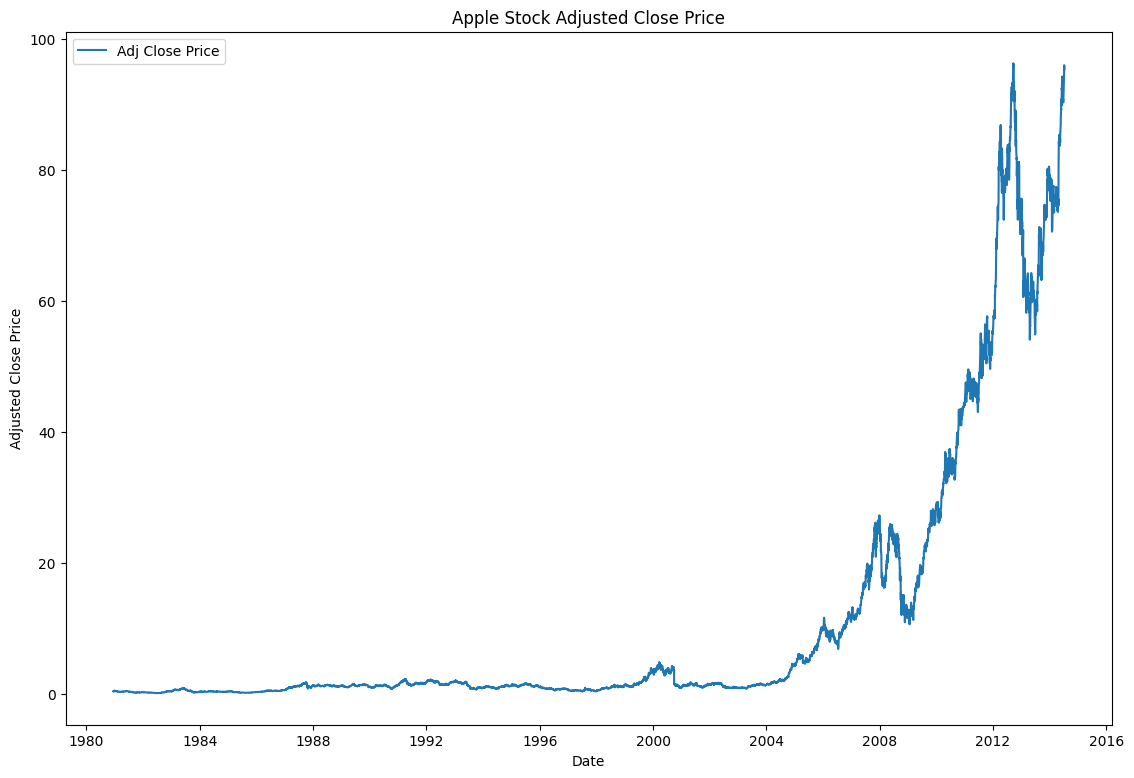

In [ ]:
plt.figure(figsize=(13.5, 9))
plt.plot(apple['Adj Close'], label='Adj Close Price')
plt.title('Apple Stock Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

### BONUS: Create your own question and answer it.

In [ ]:
#Example question - What was the highest Adjusted Close price and when?
highest_adj_close = apple['Adj Close'].max()
highest_date = apple['Adj Close'].idxmax()
print("Highest Adjusted Close Price:", highest_adj_close, "on", highest_date)

Highest Adjusted Close Price: 96.28 on 2012-09-19 00:00:00
